1. mengimport perpustakaan pandas untuk membuka data 'SELL' dalam bentuk csv. kenapa harus mengimport perpustakaan ini, karena jawaban yang paling sederhana yaitu fungsi read_csv hanya ada pada di library pandas ->  python modules can get acces to code from another module by importing the file; function using import. the import statments is the most common way of invoking the import machinery, but it is not the only way.

In [1]:
import pandas as pd

2. membuat sebuah variabel bernama sl, dan variabel sl memiliki nilai 'pd.read_csv('nama file')'. function ini berguna untuk membuka sebuah file extension csv. 
3. sl.head -> function ini mengembalikkan banyaknya data pada baris pertama di data tersebut
4. sl.tail -> function ini mengembalikkan banyaknya data pada baris terakhir di data tersebut

In [2]:
sl = pd.read_csv('sell_prices.csv')
sl.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [3]:
sl.tail()

,store_id,item_id,wm_yr_wk,sell_price
6841116,WI_3,FOODS_3_827,11617,1.0
6841117,WI_3,FOODS_3_827,11618,1.0
6841118,WI_3,FOODS_3_827,11619,1.0
6841119,WI_3,FOODS_3_827,11620,1.0
6841120,WI_3,FOODS_3_827,11621,1.0


mencari tau tentang jenis tipe data apa saja yang ada di file csv 'sell' ini
sl.info()

In [4]:

sl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


mencari tau kolom mana saja yang nilainya Non A Number

In [5]:
na = sl.isna().sum()
print(pd.DataFrame(na))

            0
store_id    0
item_id     0
wm_yr_wk    0
sell_price  0


In [6]:
sl.columns

Index(['store_id', 'item_id', 'wm_yr_wk', 'sell_price'], dtype='object')

karena nilai di dalam data sell ini ada sekian 6 juta, maka untuk memotong data tersbut ketika di run tidak error karena 'out of space' maka dilakukan slicing

In [7]:
sl_some = sl[0:300]
sl_some

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
295,CA_1,HOBBIES_1_002,11405,3.97
296,CA_1,HOBBIES_1_002,11406,3.97
297,CA_1,HOBBIES_1_002,11407,3.97
298,CA_1,HOBBIES_1_002,11408,3.97


dalam data ini kan ada 4 kolom, melalui function 'drop' ini mengeleminasi beberap kolom yang menjadi objek, dan sekaligus variabel 'X' ini menjadi prediktor

In [8]:
X = sl_some.drop(['store_id', 'item_id'], axis=1)
X

,wm_yr_wk,sell_price
0,11325,9.58
1,11326,9.58
2,11327,8.26
3,11328,8.26
4,11329,8.26
...,...,...
295,11405,3.97
296,11406,3.97
297,11407,3.97
298,11408,3.97


dan variabel 'y' sebagai target dari prediktor

In [9]:
y = sl_some['item_id']

dalam statistik, dan ML--biasanya membagi data menjadi dua subset: data pelatihan, dan data pengujian(train, dan test, tetapi juga terkadang menjadi tiga: train, memvalidasi, dan test), dan menyesuaikan model pada data TRAIN, untuk membuat PREDIKSI PADA DATA UJI

from sklearn.model_selection import train_test_split -> mengOverfitting data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
import matplotlib.pyplot as plt

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

menstandarkn fitur dg menghilangkan mean dan menskalakn ke unit varians. pemusatan, dan pen-Skalaan terjadi scr independen pada setiap fitur dengan menghitung statistik yg relevan pada sampel di set pelatihan

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(pd.DataFrame(X_train).tail())

StandardScaler(copy=True, with_mean=True, with_std=True)

copy=true -> jika false, hindari penyalinan dan lakukan penskalaan di tempat

In [14]:
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
print(pd.DataFrame(X_train_std).tail())

            0         1
235 -0.628903 -1.224745
236 -0.439284  0.816497
237 -0.518292  0.816497
238 -0.407681 -1.224745
239  1.994161  0.816497


mengimport module KNN di library sklearn

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier (n_neighbors=4)
print(knn.fit(X_test_std, y_test))
#paskan model menggunakan X_test sbg data pelatihan, dan y sebagai nilai target

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')


In [17]:
y_pred = knn.predict(X_test_std)
print(pd.DataFrame(y_pred))

                0
0   HOBBIES_1_002
1   HOBBIES_1_001
2   HOBBIES_1_001
3   HOBBIES_1_002
4   HOBBIES_1_001
5   HOBBIES_1_002
6   HOBBIES_1_001
7   HOBBIES_1_002
8   HOBBIES_1_001
9   HOBBIES_1_002
10  HOBBIES_1_001
11  HOBBIES_1_002
12  HOBBIES_1_001
13  HOBBIES_1_002
14  HOBBIES_1_002
15  HOBBIES_1_001
16  HOBBIES_1_002
17  HOBBIES_1_002
18  HOBBIES_1_002
19  HOBBIES_1_001
20  HOBBIES_1_001
21  HOBBIES_1_002
22  HOBBIES_1_002
23  HOBBIES_1_002
24  HOBBIES_1_001
25  HOBBIES_1_002
26  HOBBIES_1_002
27  HOBBIES_1_002
28  HOBBIES_1_002
29  HOBBIES_1_002
30  HOBBIES_1_001
31  HOBBIES_1_001
32  HOBBIES_1_001
33  HOBBIES_1_002
34  HOBBIES_1_002
35  HOBBIES_1_002
36  HOBBIES_1_001
37  HOBBIES_1_002
38  HOBBIES_1_001
39  HOBBIES_1_001
40  HOBBIES_1_002
41  HOBBIES_1_002
42  HOBBIES_1_002
43  HOBBIES_1_001
44  HOBBIES_1_002
45  HOBBIES_1_002
46  HOBBIES_1_002
47  HOBBIES_1_001
48  HOBBIES_1_001
49  HOBBIES_1_001
50  HOBBIES_1_002
51  HOBBIES_1_001
52  HOBBIES_1_001
53  HOBBIES_1_001
54  HOBBIE

In [18]:
pr = knn.predict_proba(X_test_std)
print(pd.DataFrame(pr))

      0    1
0   0.0  1.0
1   1.0  0.0
2   1.0  0.0
3   0.0  1.0
4   1.0  0.0
5   0.0  1.0
6   1.0  0.0
7   0.0  1.0
8   1.0  0.0
9   0.0  1.0
10  1.0  0.0
11  0.0  1.0
12  1.0  0.0
13  0.0  1.0
14  0.0  1.0
15  1.0  0.0
16  0.0  1.0
17  0.0  1.0
18  0.0  1.0
19  1.0  0.0
20  1.0  0.0
21  0.0  1.0
22  0.0  1.0
23  0.0  1.0
24  1.0  0.0
25  0.0  1.0
26  0.0  1.0
27  0.0  1.0
28  0.0  1.0
29  0.0  1.0
30  1.0  0.0
31  1.0  0.0
32  1.0  0.0
33  0.0  1.0
34  0.0  1.0
35  0.0  1.0
36  1.0  0.0
37  0.0  1.0
38  1.0  0.0
39  1.0  0.0
40  0.0  1.0
41  0.0  1.0
42  0.0  1.0
43  1.0  0.0
44  0.0  1.0
45  0.0  1.0
46  0.0  1.0
47  1.0  0.0
48  1.0  0.0
49  1.0  0.0
50  0.0  1.0
51  1.0  0.0
52  1.0  0.0
53  1.0  0.0
54  0.0  1.0
55  0.0  1.0
56  1.0  0.0
57  1.0  0.0
58  0.0  1.0
59  1.0  0.0


In [19]:
#imprt lib untuk mlht keakuratan data prediksi dengan data aktual
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
#menghitung confussion matrix tujuan untuk menguji/mengevaluasi keakuratan klasifikasi
cn = confusion_matrix(y_test, y_pred)

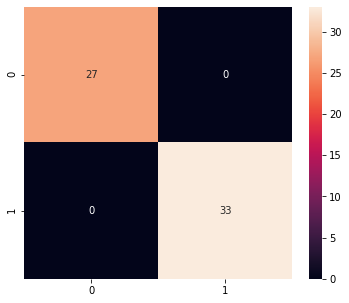

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (6, 5))
sns.heatmap(cn, annot = True)

In [22]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

HOBBIES_1_001       1.00      1.00      1.00        27
HOBBIES_1_002       1.00      1.00      1.00        33

     accuracy                           1.00        60
    macro avg       1.00      1.00      1.00        60
 weighted avg       1.00      1.00      1.00        60



dari nilai ini, algoritma ML bekerja dengan baik, dan mengklasifikasikan masing2 class dengan sdikit nilai bias

In [23]:
y

0      HOBBIES_1_001
1      HOBBIES_1_001
2      HOBBIES_1_001
3      HOBBIES_1_001
4      HOBBIES_1_001
           ...      
295    HOBBIES_1_002
296    HOBBIES_1_002
297    HOBBIES_1_002
298    HOBBIES_1_002
299    HOBBIES_1_002
Name: item_id, Length: 300, dtype: object

In [24]:
X.columns

Index(['wm_yr_wk', 'sell_price'], dtype='object')

In [25]:
x = pd.DataFrame(X['wm_yr_wk'])
x.columns

Index(['wm_yr_wk'], dtype='object')

In [26]:
y.info()

AttributeError: 'Series' object has no attribute 'info'